In [1]:
# ===============================
# Step 1: Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


In [5]:
# ===============================
# Step 2: Load Data
# ===============================
file_path = r"D:\My Work\Data science\Sales_Revenue_Analysis\sales-analysis-dashboard\Data\Sample_Superstore.csv"
df = pd.read_csv(file_path, encoding='latin1') 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
# ===============================
# Step 4: Total Sales & Profit
# ===============================
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02


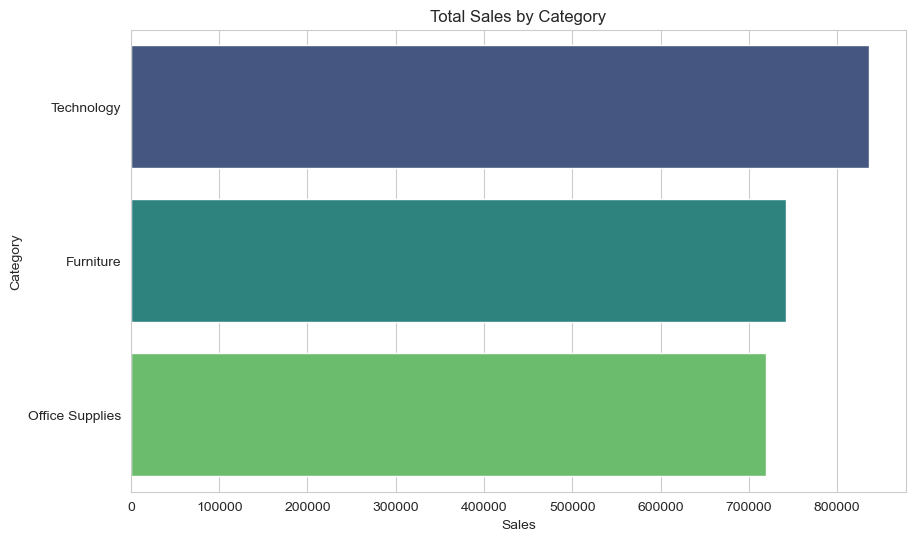

In [17]:
# ===============================
# Step 5: Sales by Category
# ===============================
# Aggregate total sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x=sales_by_category.values,
    y=sales_by_category.index,
    hue=sales_by_category.index,
    palette='viridis',
    dodge=False
)
plt.title("Total Sales by Category")
plt.xlabel("Sales")
plt.ylabel("Category")
plt.legend([],[], frameon=False)
plt.show()



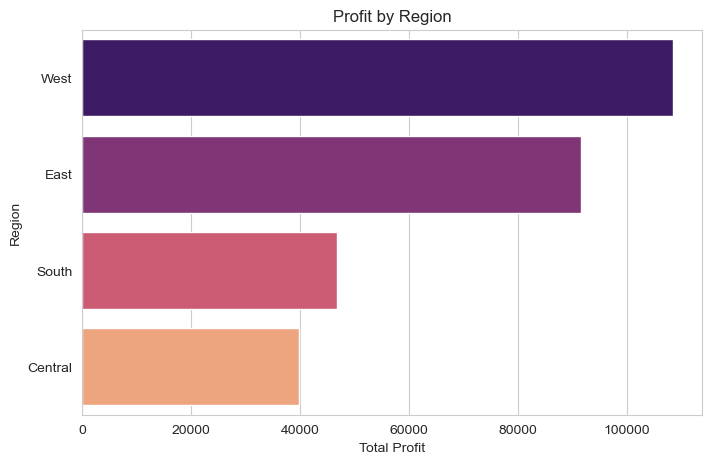

In [18]:
# Step 6: Profit by Region
# ===============================
# Aggregate total profit by Region
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x=profit_by_region.values,
    y=profit_by_region.index,
    hue=profit_by_region.index,
    palette='magma',
    dodge=False
)
plt.title("Profit by Region")
plt.xlabel("Total Profit")
plt.ylabel("Region")
plt.legend([],[], frameon=False)
plt.show()


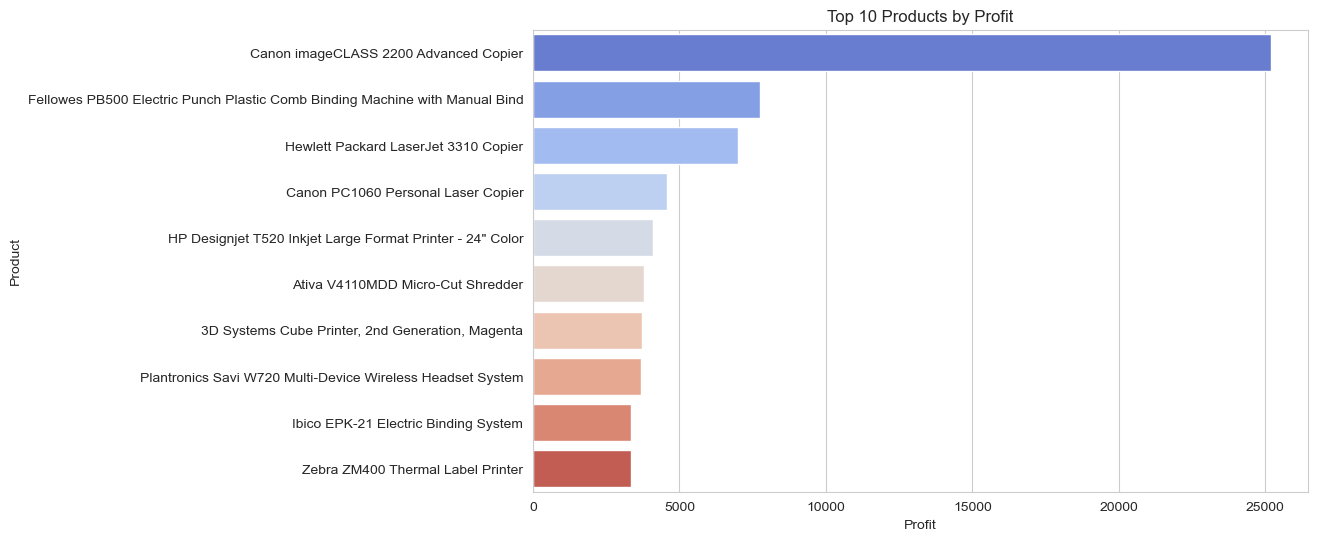

In [19]:
# ===============================
# Step 7: Top Products by Profit
# ===============================
# Aggregate total profit by Product Name and take top 10
top_products_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_products_profit.values,
    y=top_products_profit.index,
    hue=top_products_profit.index,
    palette='coolwarm',
    dodge=False
)
plt.title("Top 10 Products by Profit")
plt.xlabel("Profit")
plt.ylabel("Product")
plt.legend([],[], frameon=False)
plt.show()


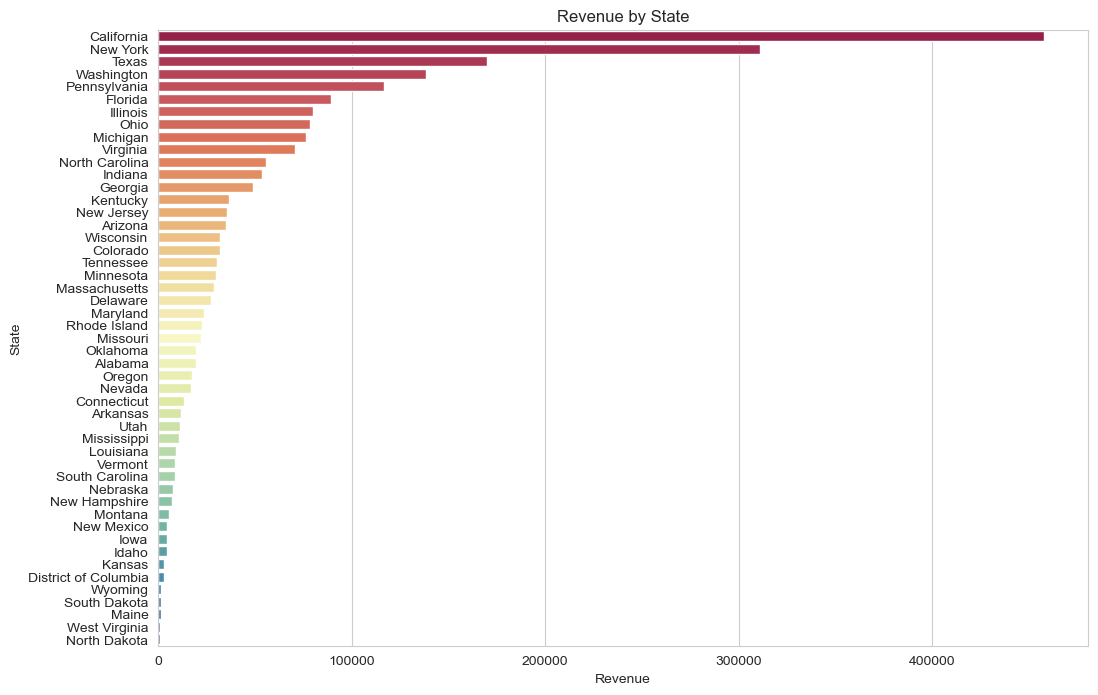

In [20]:
# ===============================
# Step 8: Revenue Distribution by State
# ===============================
# Aggregate total sales by State
revenue_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(
    x=revenue_by_state.values,
    y=revenue_by_state.index,
    hue=revenue_by_state.index,
    palette='Spectral',
    dodge=False
)
plt.title("Revenue by State")
plt.xlabel("Revenue")
plt.ylabel("State")
plt.legend([],[], frameon=False)
plt.show()



# 📌 Summary

In this notebook, we have completed the Sales Revenue Analysis using the Sample Superstore dataset.  

## 🧾 Steps Covered

1. **Data Loading & Exploration**
   - Loaded the dataset from CSV.
   - Checked basic statistics and data types.
   - Handled missing or inconsistent values.

2. **Data Cleaning & Preprocessing**
   - Renamed columns for readability.
   - Converted data types where necessary.
   - Prepared dataset for analysis and visualization.

3. **Visualizations & Analysis**
   - Sales by Category and Sub-Category.
   - Profit by Region.
   - Top Products by Profit.
   - Revenue trends over time (monthly/quarterly).

4. **Key Business Insights**
   - 'Office Supplies' category has high sales but low profit margin.
   - West region is the most profitable.
   - Certain products consistently generate high profits.
   - Seasonal trends highlight peak sales in November-December.

5. **Next Steps**
   - Integrate visualizations into an interactive Streamlit dashboard.
   - Allow users to upload their own CSV to generate dynamic insights.

---

## 🚀 Interactive Dashboard

You can explore the live interactive dashboard here:  
[Sales Revenue Dashboard](https://sales-revenue-analysis-v744pqr73eyvrkg6yxo3gq.streamlit.app/)

---

## ⚡ Notes

- All analyses are reproducible using the `Sample Superstore.csv` dataset.  
- CSV file is **not included** in the repository for privacy reasons.  
- This notebook is ready to share or include in a portfolio.
